# Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the
patients' information. The dataset used for this analysis is Insurance dataset from Kaggle.
The dataset contains 1338 observations and 7 variables.

### Data dictionary

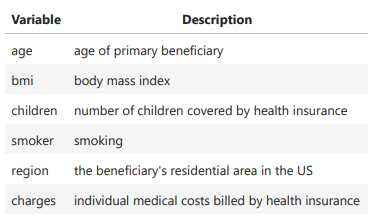

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.shape

(1338, 7)

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
cols = ['sex','smoker','region']

for col in cols:
    print(df[col].value_counts())
    print('\n')

sex
male      676
female    662
Name: count, dtype: int64


smoker
no     1064
yes     274
Name: count, dtype: int64


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64




Replacing the categorical variables with numerical values.
<ul>
<li>sex : 1 - male, 0 - female</li>
<li>smoker : 1 - yes, 0 - no</li>
<li>region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest</li>
</ul>

In [12]:
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northeast':0,'northwest':1,'southeast':2,'southwest':3})

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Exploratory Data Analysis

Visualization of the data is a good way to understand the data. In this section, I will plot
the distribution of each variable to get an overview about their counts and distributions

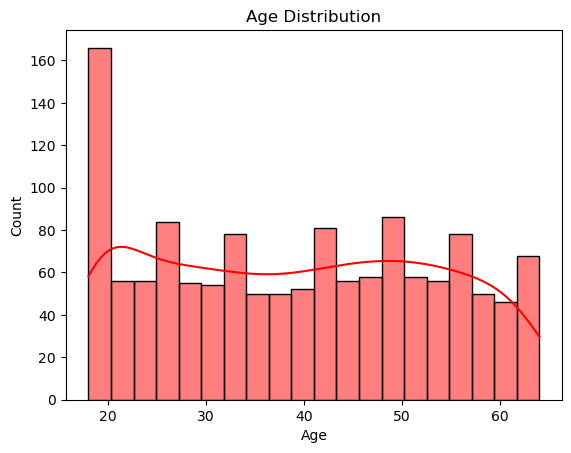

In [16]:
#age distribution
sns.histplot(df.age,bins=20, kde=True,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

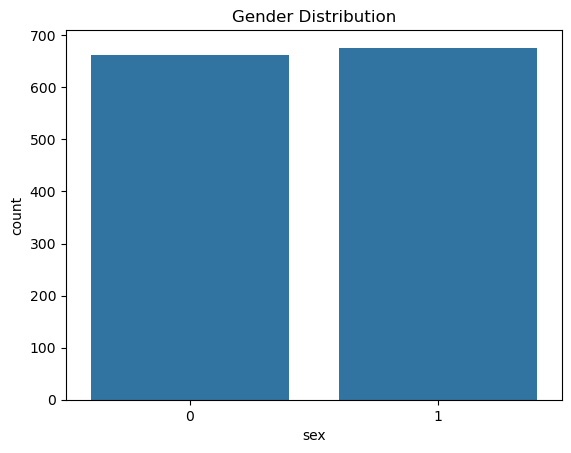

In [17]:
sns.countplot(x='sex',data=df)
plt.title('Gender Distribution')

It is clear that number of males and females are almost equal in the dataset.

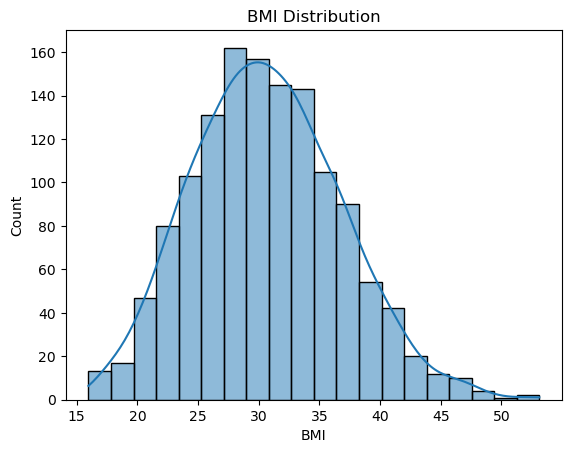

In [19]:
sns.histplot(x='bmi',data=df,bins=20,kde=True)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as
overweight and could be a major factor in increasing the medical cost.


Text(0, 0.5, 'Count')

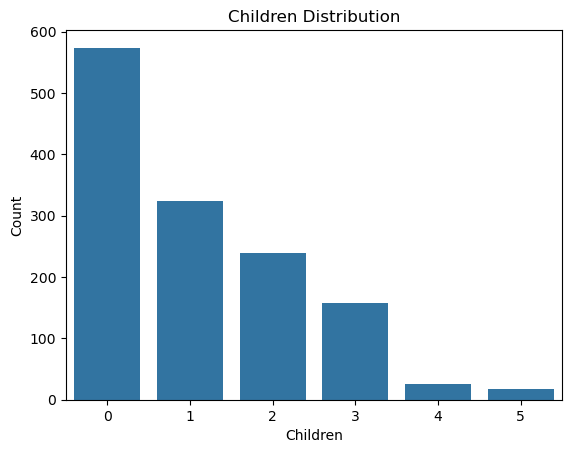

In [21]:
sns.countplot(x='children',data=df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')

The graph clearly shows that most of the patients have no children and very few patients
have more than 3 children.

Text(0, 0.5, 'Count')

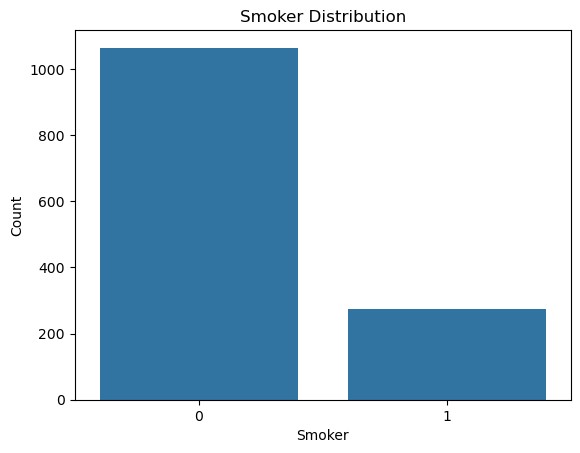

In [23]:
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

Smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.


##### Smoker count with respect to the children count

<Axes: xlabel='smoker', ylabel='count'>

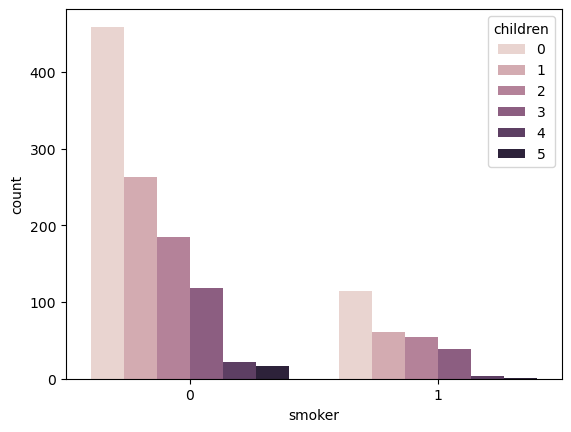

In [26]:
sns.countplot(x = df.smoker, hue = df.children)

Text(0, 0.5, 'Count')

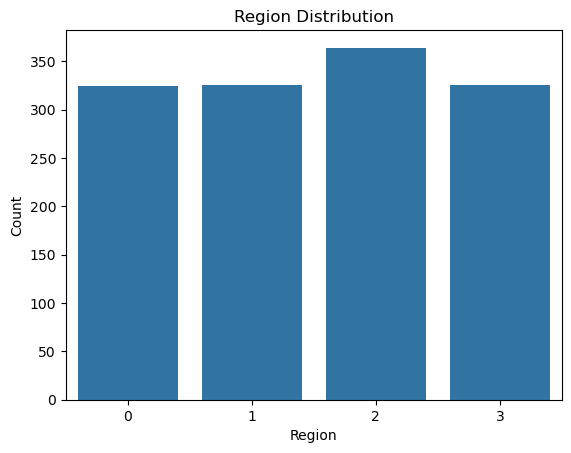

In [27]:
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

The count of patient from northwest is slighltly higher than the other regions, but the
number of patients from other regions are almost equal.


Text(0, 0.5, 'Count')

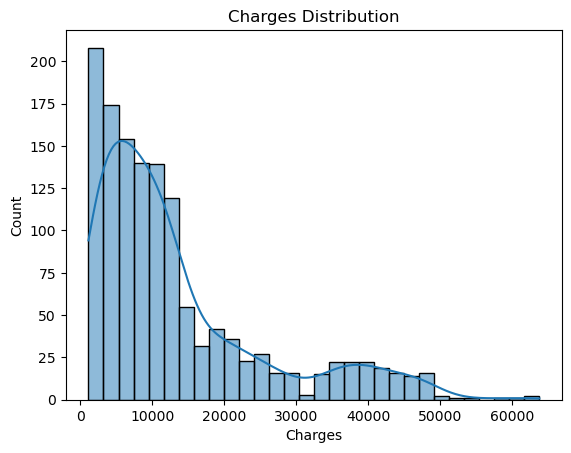

In [29]:
sns.histplot(x='charges',data=df,kde=True)
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Count')

Most of the medical expenses are below 20000, with negligible number of patients
having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients
under each category of the variables. Now I will look into the corrolation between the
variables.


## Correlation

In [32]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


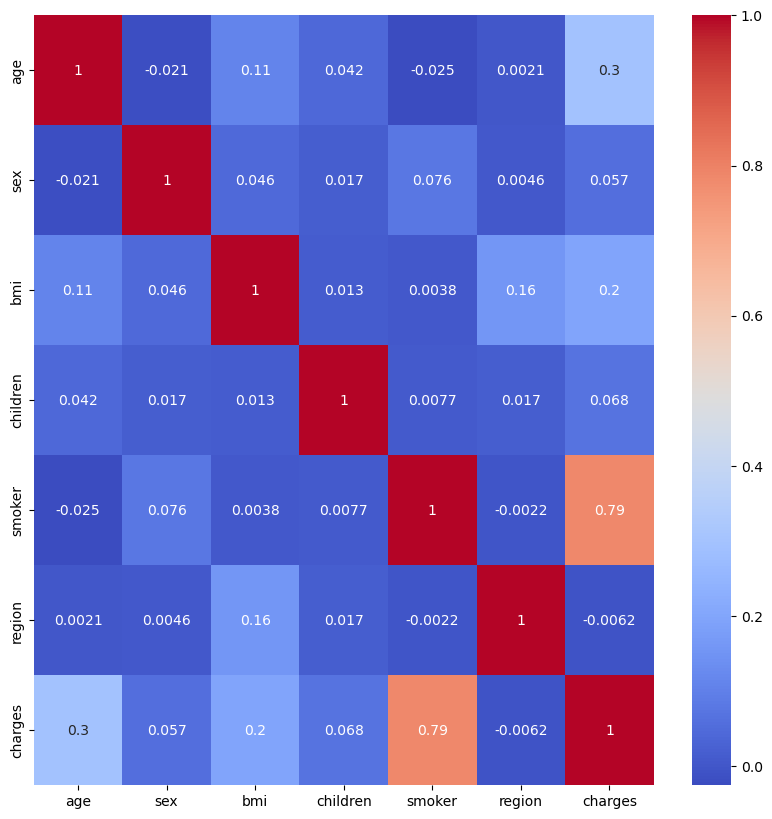

In [33]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant correlation with the medical expenses. Now I
will explore more into patients' smoking habits and their relations with other factors.

#### Plotting the smoker count with patient's gender

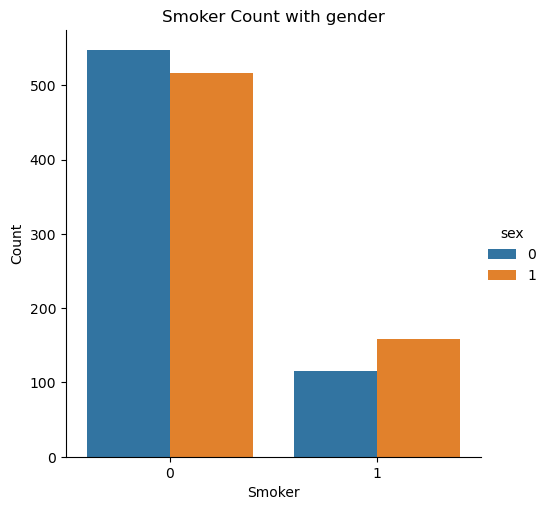

In [36]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical
treatment expense for males would be more than females, given the impact of smoking
on the medical expenses.

<Axes: xlabel='sex', ylabel='charges'>

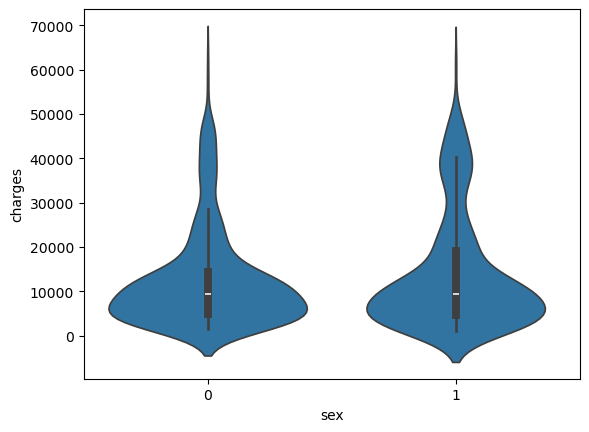

In [38]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

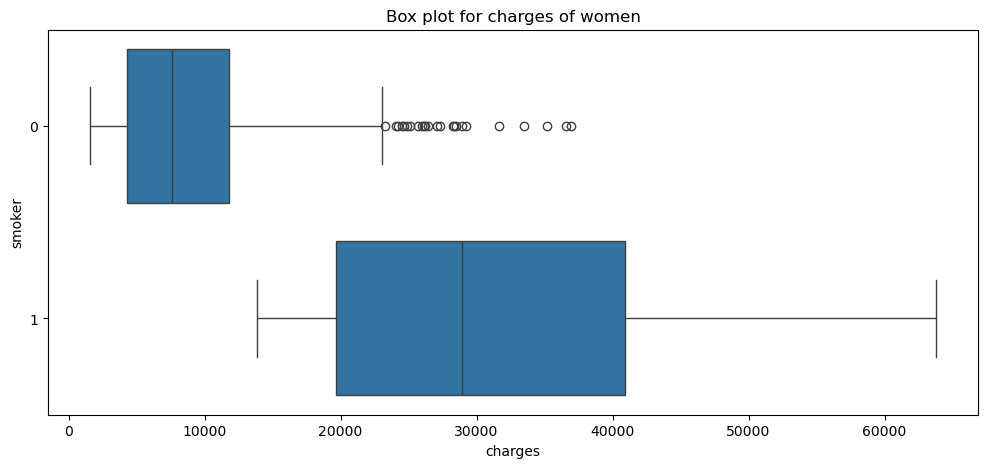

In [39]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 0)] , orient="h")

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

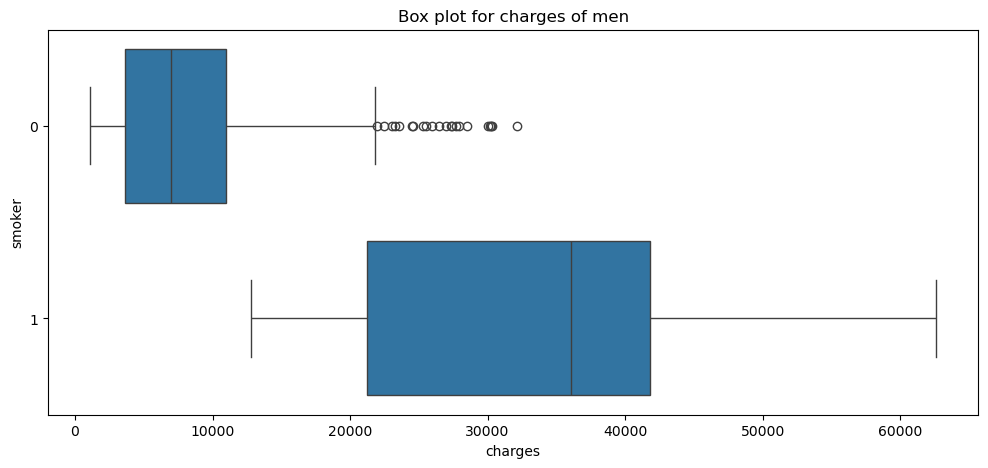

In [40]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data = df[(df.sex == 1)] , orient="h")


The assumption is true, that the medical expense of males is greater than that of females.
In addituion to that medical expense of smokers is greater than that of non-smokers.

### Smokers and age distribution

C:\Users\cris3\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


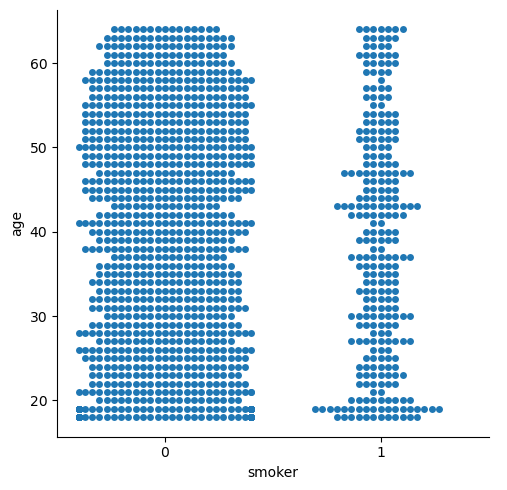

In [43]:
sns.catplot(x='smoker',y='age',kind='swarm',data=df)

From the graph, we can see that there significant number of smokers of age 19. Now I
will study the medical expense of smokers of age 19.

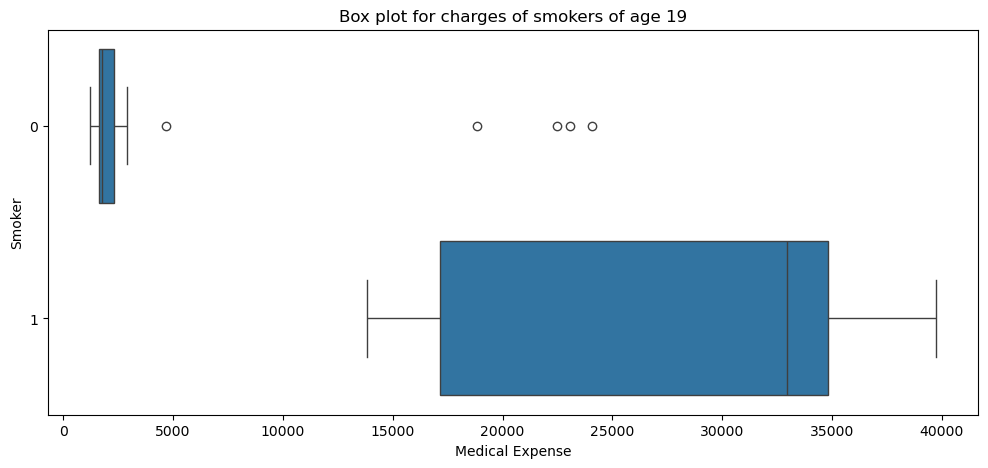

In [45]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non
smokers. In non smokers we can see some outliners, which may be due to illness or
accidents.
    
It is clear that the medical expense of smokers is higher than that of non-smokers. Now I
will plot the charges distribution with repect to patients age of smokers and nonsmokers.


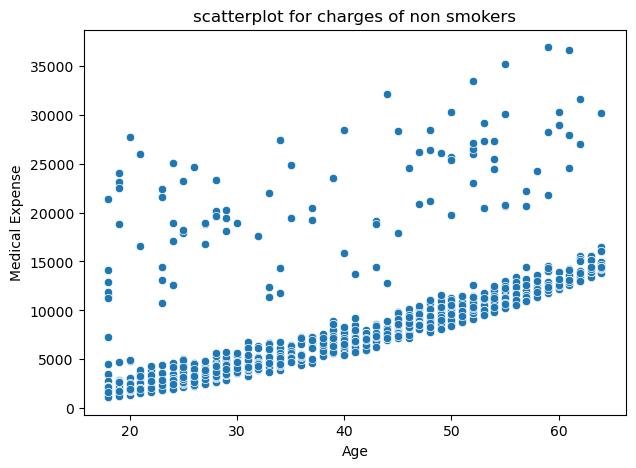

In [47]:
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

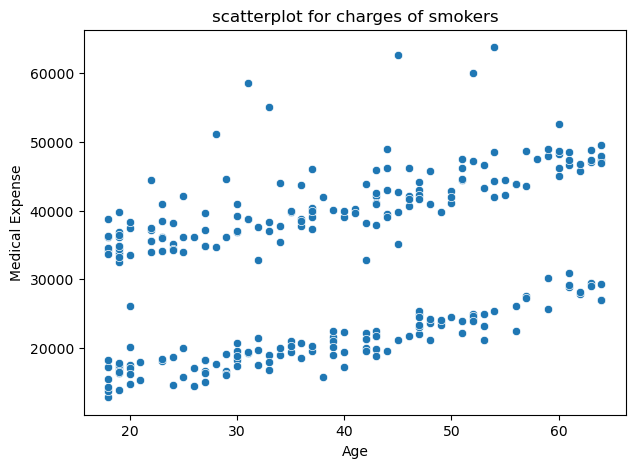

In [49]:
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data = df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high
medical expense which may be due to smoking related illness and the other with low
medical expense which may be due age related illness.

Now, in order to get a more clear picture, I will combine these two graphs.

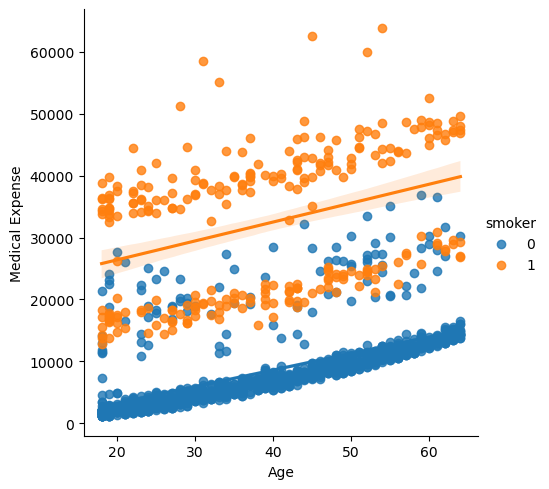

In [51]:
sns.lmplot(x="age", y="charges", data = df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now, we clearly understand the variation in charges with respect to age and smoking
habits. The medical expense of smokers is higher than that of non-smokers. In nonsmokers, the cost of treatment increases with age which is obvious. But in smokers, the
cost of treatment is high even for younger patients, which means the smoking patients
are spending upon their smoking related illness as well as age related illness.

### Charges distribution for patients with BMI greater than 30 i.e. obese patients

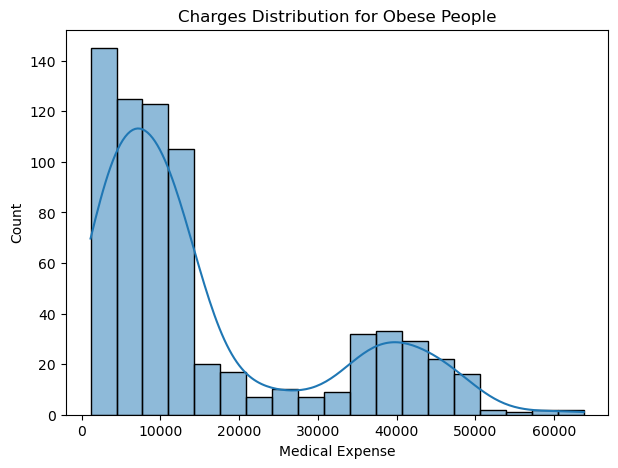

In [54]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi >= 30)]['charges'],kde=True)
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

### Charges distribution for patients with BMI less than 30 i.e. healthy patients

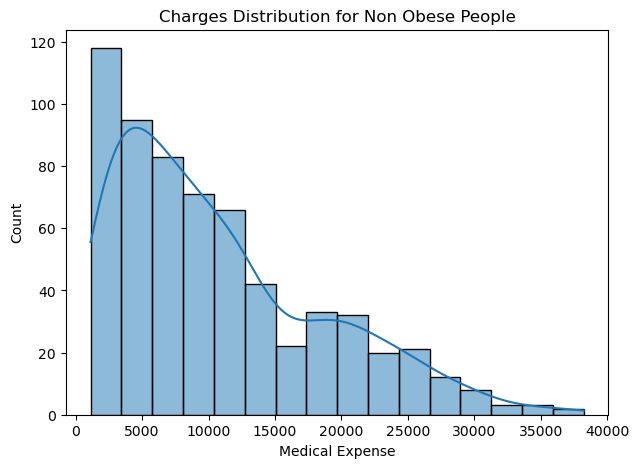

In [56]:
#bmi charges distribution for obese people
plt.figure(figsize=(7,5))
sns.histplot(df[(df.bmi < 30)]['charges'],kde=True)
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than
those with BMI greater than 30.

**Through the EDA, we have a clear understanding about the data and the correlation
between the variables. Now, I will build a model to predict the medical expense of
patients.**


## Train Test Split

In [68]:
X = df.drop('charges',axis=1)
y = df.charges

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

I will be using the following models in my predicition:
1. Decision Tree Regressor
2. Random Forest Regressor
3. Linear Regression

### Decision Tree Regressor

In [80]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [84]:
dt.fit(X_train,y_train)

print(dt.score(X_test,y_test))

dt_pred = dt.predict(X_test)

0.7120743720975267


### Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [91]:
rfr.fit(X_train,y_train)

print(rfr.score(X_test,y_test))

rfr_pred = rfr.predict(X_test)

0.8658633451815065


### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [96]:
lr.fit(X_train,y_train)

print(lr.score(X_test,y_test))

lr_pred = lr.predict(X_test)

0.7833463107364539


## Model Evaluation

In [111]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Decision Tree Regressor

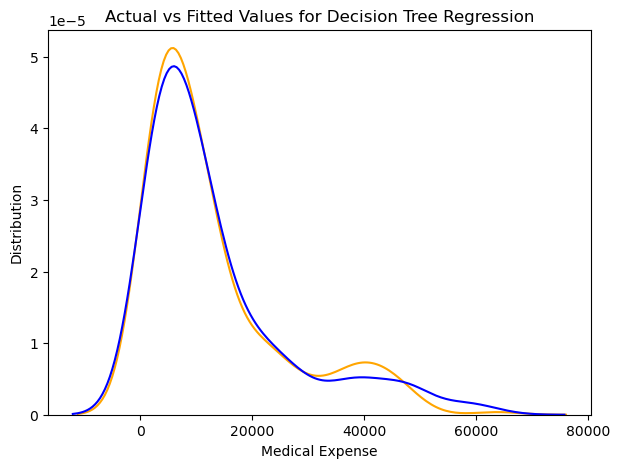

In [128]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.kdeplot(y_test, color="orange", label="Actual Value")
sns.kdeplot(dt_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [130]:
print('MAE:', mean_absolute_error(y_test, dt_pred))
print('MSE:', mean_squared_error(y_test, dt_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dt_pred)))
print('R2 Score:', r2_score(y_test, dt_pred))

MAE: 2976.1183122723883
MSE: 44700088.49583138
RMSE: 6685.812478362774
R2 Score: 0.7120743720975267


### Random Forest Regressor

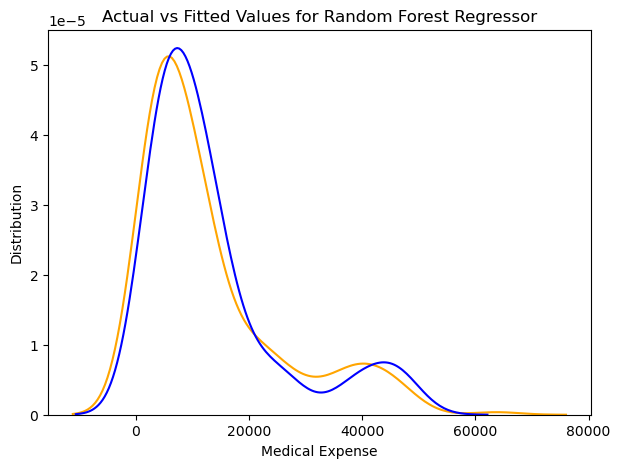

In [133]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.kdeplot(y_test, color="orange", label="Actual Value")
sns.kdeplot(rfr_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [135]:
print('MAE:', mean_absolute_error(y_test, rfr_pred))
print('MSE:', mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rfr_pred)))
print('R2 Score:', r2_score(y_test, rfr_pred))

MAE: 2508.9045967814063
MSE: 20824545.507120993
RMSE: 4563.391886209313
R2 Score: 0.8658633451815065


### Linear Regression

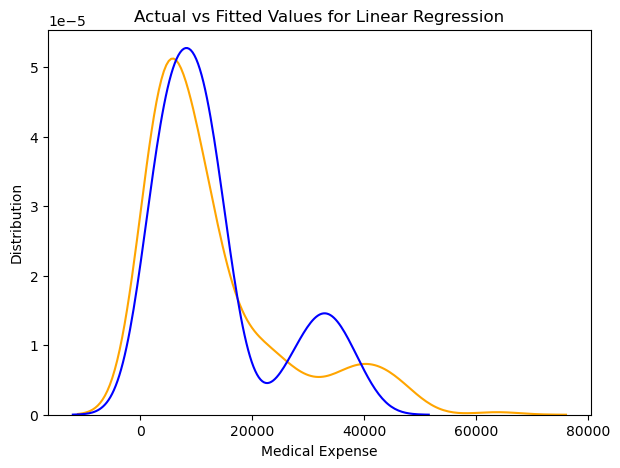

In [138]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.kdeplot(y_test, color="orange", label="Actual Value")
sns.kdeplot(lr_pred, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [140]:
print('MAE:', mean_absolute_error(y_test, lr_pred))
print('MSE:', mean_squared_error(y_test, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lr_pred)))
print('R2 Score:', r2_score(y_test, lr_pred))

MAE: 4186.508898366434
MSE: 33635210.431178406
RMSE: 5799.587091438356
R2 Score: 0.7833463107364539


### Feature Importance

Text(0.5, 1.0, 'Random Forest Regressor')

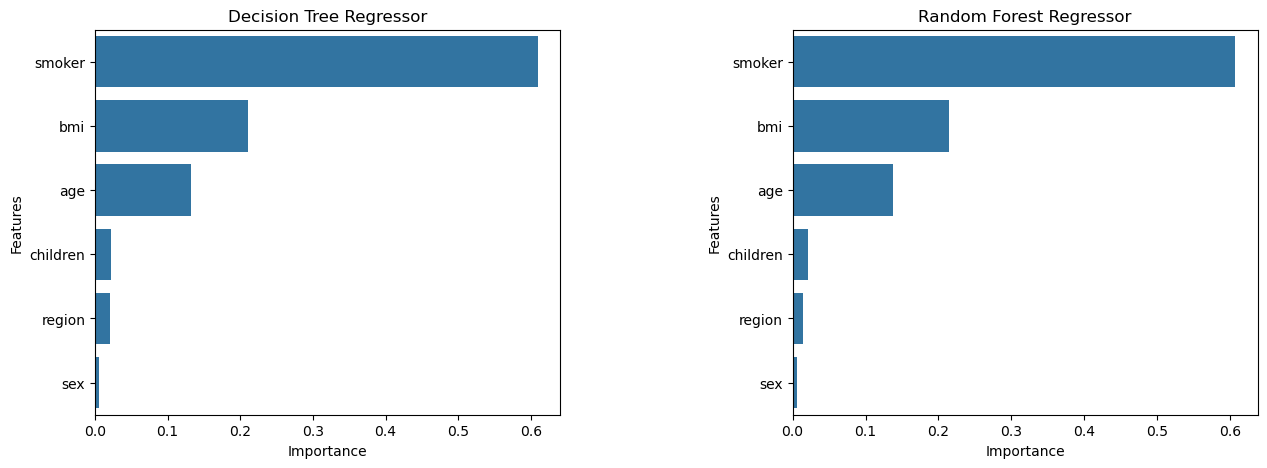

In [153]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dt.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')


##  Conclusion

From the above models, we can see that Random Forest
Regressor is giving the best result with the least RMSE value. Therefore, I will use Random Forest Regressor to
predict the medical expense of patients.

Moreover, the medical expense of smokers is higher than that of non-smokers. The
medical expense of patients with BMI greater than 30 is higher than that of patients with
BMI less than 30. The medical expense of older patients is higher than that of younger
patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients
depends on their age, BMI, smoking habits.